In [26]:
# librerie
import pandas as pd
from funzioni import *
import matplotlib.pyplot as plt
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 282
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             239 non-null    object
 1   Dalle            239 non-null    object
 2   Alle             239 non-null    object
 3   Tot. Ore         239 non-null    object
 4   Formatore (ROL)  239 non-null    object
 5   Descrizione UF   239 non-null    object
 6   Dettagli         239 non-null    object
dtypes: object(7)
memory usage: 14.9+ KB
None                              Data  Dalle   Alle Tot. Ore  Formatore (ROL)  \
count                         239    239    239      239              239   
unique                        101      5      5        3               15   
top     mercoledì 31 gennaio 2024  11:15  13:15    02:00  CHINELLATO ERIS   
freq                            4     90     90      184               67   

                             Descrizione UF                     

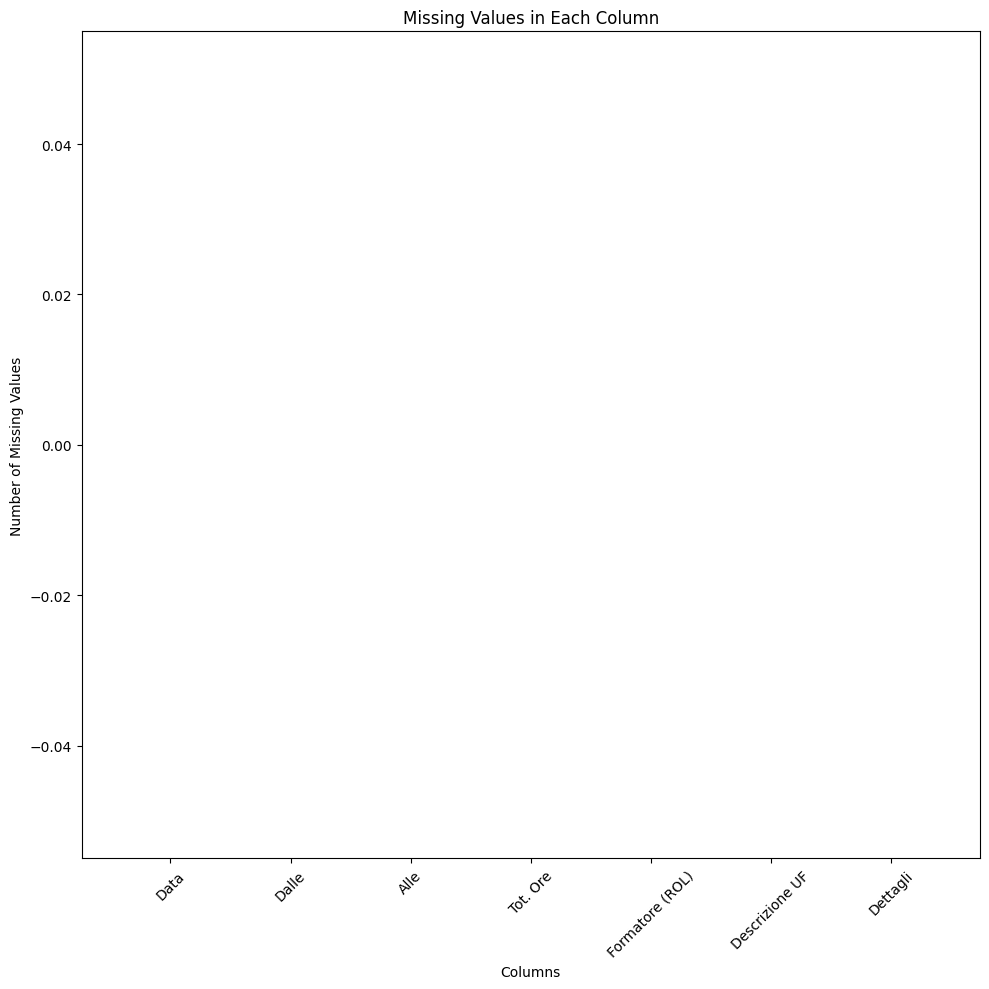

In [32]:
#1°anno
# data import
data = pd.read_csv('data/Calendario AI&DS - biennio 2023-25 - Calendario 1° anno.csv', skiprows= 3).dropna()
print(data.info(), data.describe())
#visualizzazione missing values
print('Missing values')
plt.figure(figsize=(10, 10))
plt.bar(data.columns, data.isnull().sum())
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()

data.drop(columns= ['Dalle', 'Alle','Dettagli'], inplace=True)
data.rename(columns={'Formatore (ROL)':'Docente','Tot. Ore':'ore', 'Data':'data'},inplace=True)
# Function to convert HH:MM or HH:MM:SS to float hours
# Apply the conversion function to the 'ore' column
data['ore'] = data['ore'].apply(convert_to_float_hours)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Giorno      145 non-null    object 
 1   Data        145 non-null    object 
 2   Orario      139 non-null    object 
 3   Unnamed: 3  139 non-null    object 
 4   Ore         133 non-null    object 
 5   Modulo      133 non-null    float64
 6   Argomento   137 non-null    object 
 7   Docente     117 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.2+ KB
None            Modulo
count  133.000000
mean    10.721805
std      2.378417
min      5.000000
25%      9.000000
50%     11.000000
75%     11.000000
max     16.000000
Missing values


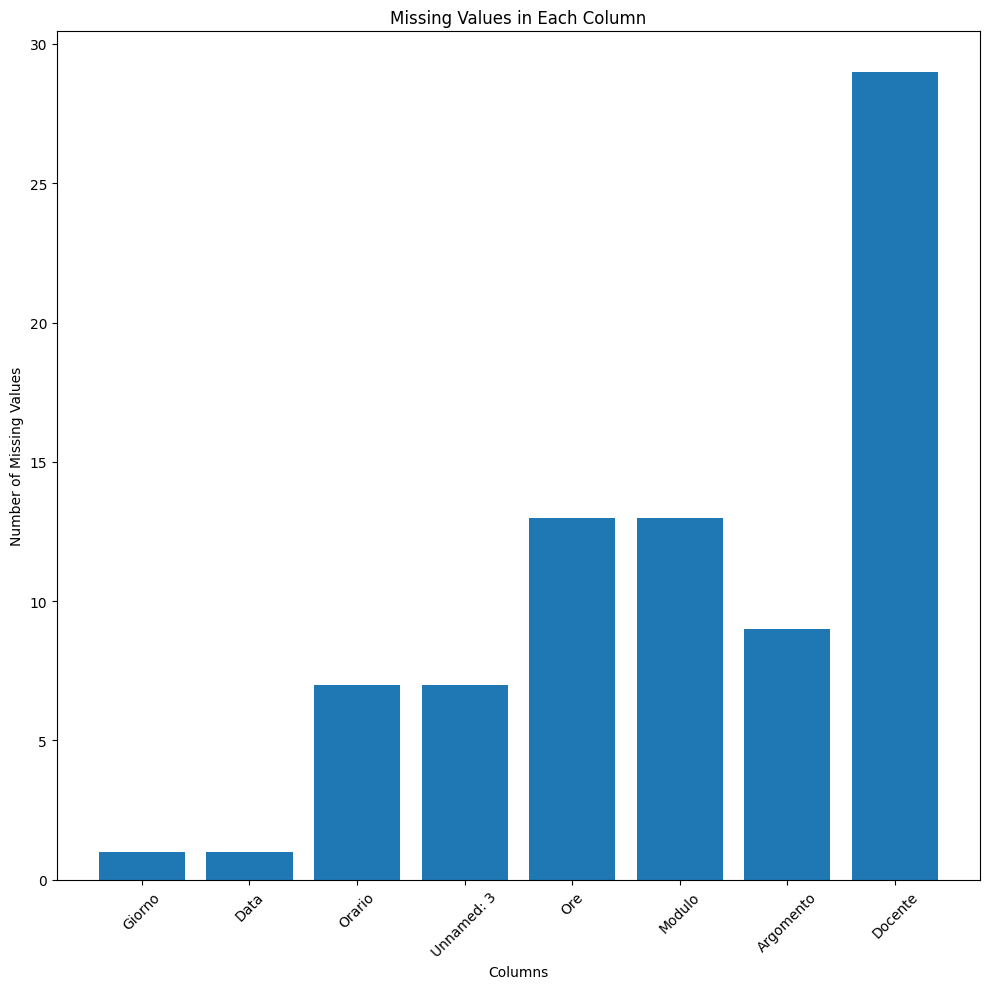

In [33]:
# 2°anno
# data import
data = pd.read_csv('data/Calendario AI&DS - biennio 2023-25 - Calendario 2° anno.csv', skiprows= 7)
print(data.info(), data.describe())
#visualizzazione missing values
print('Missing values')
plt.figure(figsize=(10, 10))
plt.bar(data.columns, data.isnull().sum())
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()

data = data.dropna()
data.rename(columns={'Orario':'inizio', 'Unnamed: 3': 'fine'},inplace=True)
data['Modulo']= data['Modulo'].astype('int')
data['inizio']= data['inizio'].str.replace(',', '.').astype(float)
data['fine']= data['fine'].str.replace(',', '.').astype(float)
data['Ore' ]= data['Ore'].str.replace(',', '.').astype(float)
data['Data'] = pd.to_datetime(data['Data'],format='%d/%m/%Y')
data = data.groupby('Docente')['Ore'].sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Cognome Nome                             27 non-null     object 
 1   CHINELLATO ERIS                          27 non-null     float64
 2   CHINELLATO ERIS.1                        26 non-null     float64
 3   Unnamed: 3                               26 non-null     object 
 4   GIUNTA ANTONIO                           26 non-null     float64
 5   BATTILANA MATTEO                         27 non-null     float64
 6   Unnamed: 6                               26 non-null     object 
 7   ZIGLIOTTO WALTER                         26 non-null     float64
 8   BATTILANA MATTEO.1                       25 non-null     float64
 9   BATTILANA MATTEO.2                       25 non-null     float64
 10  Unnamed: 10                              25 non-null

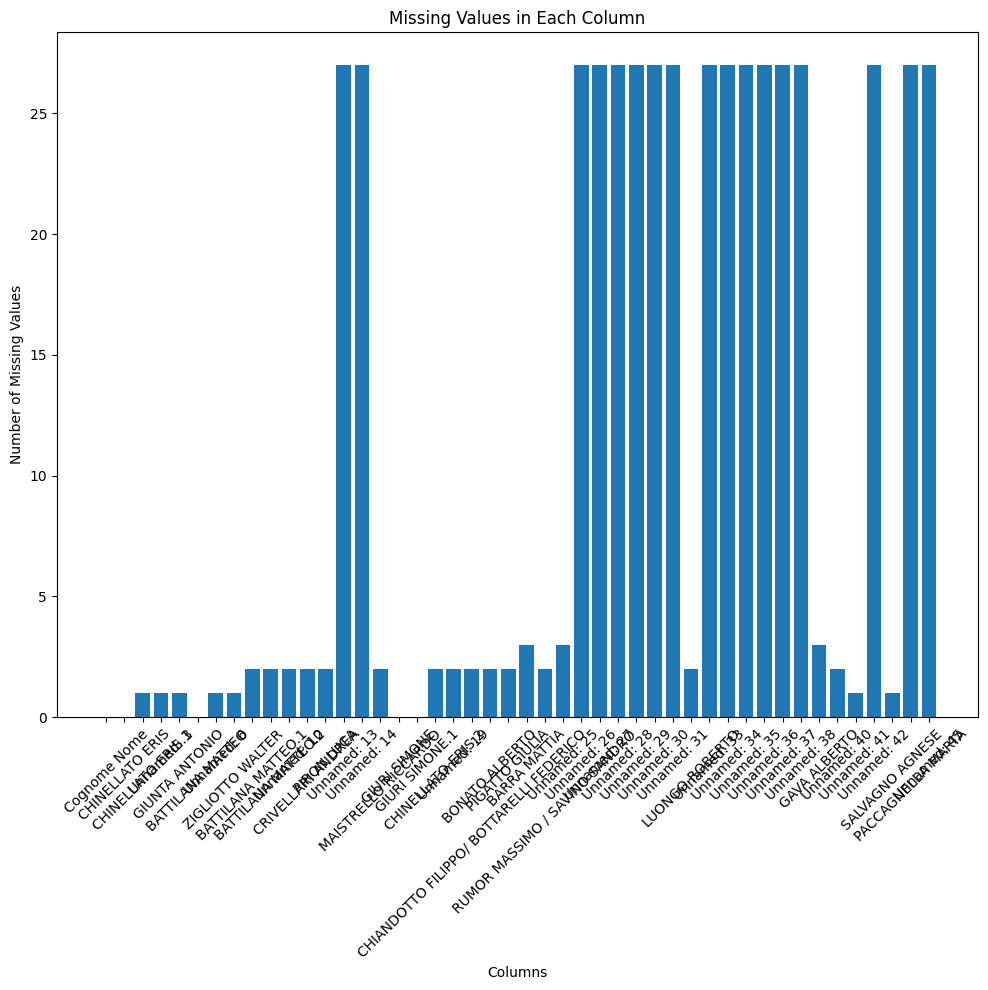

In [38]:
# valutazioni
data = pd.read_excel('data/Valutazioni_Presenze.xlsx', sheet_name='Valutazioni', skiprows=3)[:-2]
print(data.info(), data.describe())
#visualizzazione missing values
print('Missing values')
plt.figure(figsize=(10, 10))
plt.bar(data.columns, data.isnull().sum())
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()
unnamed = []
for col in data.columns:
    if col.startswith('Unnamed') == True:
        unnamed.append(col)
data.drop(columns=unnamed, inplace=True)
data.set_index('Cognome Nome', drop=True, inplace=True)
data['Media'] = data.iloc[:, 1:].mean(axis=1)
#data.mean().mean()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, ALBERTI LEONARDO to VIGATO FRANCESCO
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ore presenza              27 non-null     float64
 1   Stage 1 anno              25 non-null     float64
 2   Totale                    25 non-null     float64
 3   % presenza su ore svolte  25 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB
None        Ore presenza  Stage 1 anno       Totale  % presenza su ore svolte
count     27.000000      25.00000    25.000000                 25.000000
mean     768.513333     309.74000  1119.765600                  0.913348
std      156.988040       9.52969    53.090288                  0.043300
min      238.000000     288.00000  1028.910000                  0.839200
25%      761.420000     304.00000  1072.620000                  0.874900
50%      793.470000     312.00000  1125.780000              

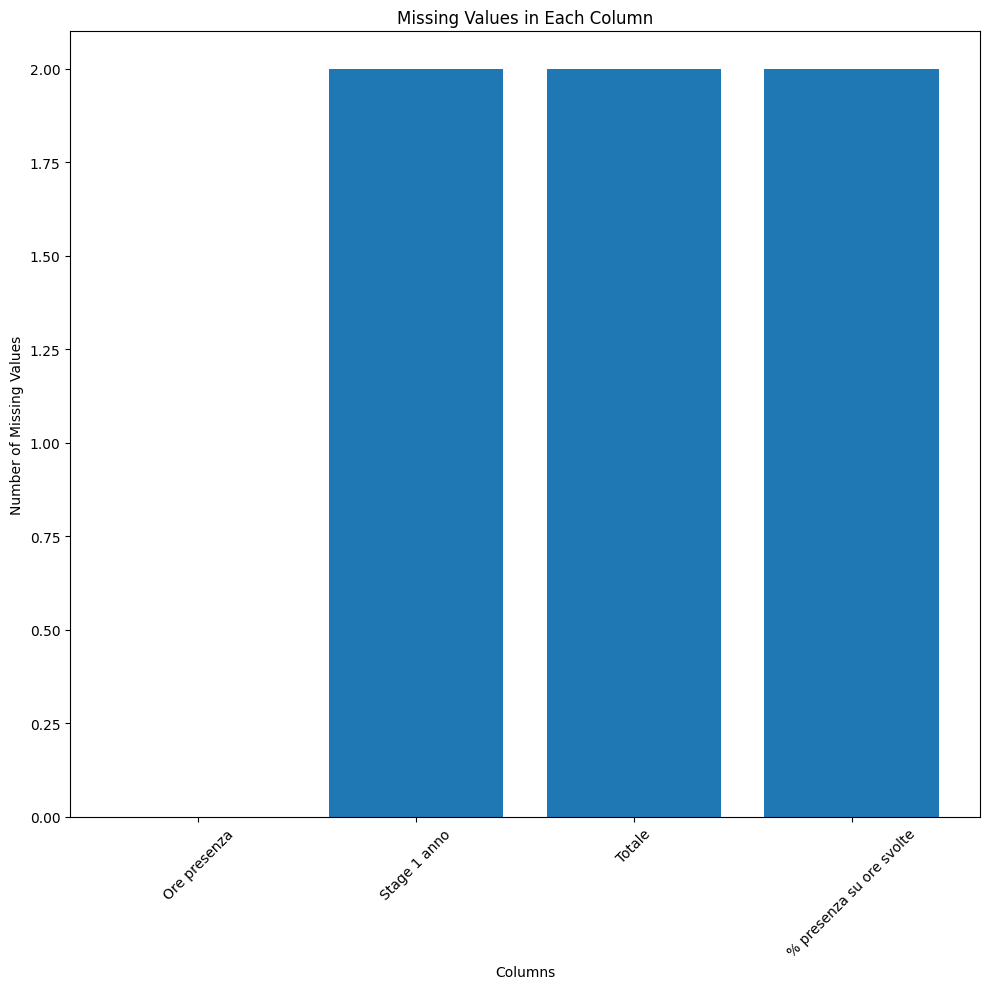

In [37]:
# presenze
data = pd.read_excel('data/Valutazioni_Presenze.xlsx', sheet_name='Presenze', skiprows=2)[:-2]
data.set_index('Cognome Nome', drop=True, inplace=True)
print(data.info(), data.describe())
#visualizzazione missing values
print('Missing values')
plt.figure(figsize=(10, 10))
plt.bar(data.columns, data.isnull().sum())
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()
data = data.dropna()